In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 
sns.set()

Ecommerce Customers csv file from the company

- Avg. Session Length: Average session of in-store style advice sessions.
- Time on App: Average time spent on App in minutes
- Time on Website: Average time spent on Website in minutes
- Length of Membership: How many years the customer has been a member.

In [2]:
df = pd.read_csv(r"\Ecommerce Customers")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

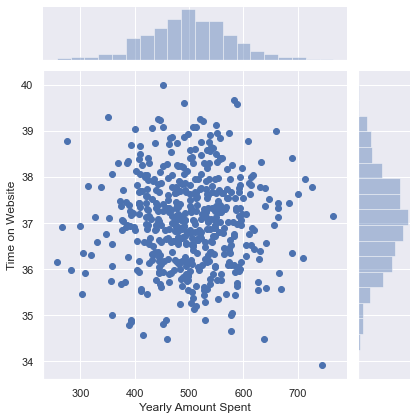

In [6]:
sns.jointplot(x=df['Yearly Amount Spent'], y=df['Time on Website'])

No material relationship

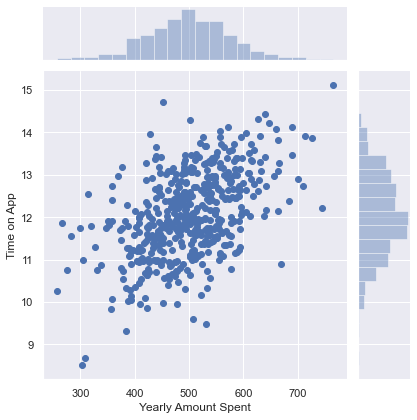

In [7]:
sns.jointplot(x=df['Yearly Amount Spent'], y=df['Time on App'])

Positive relationship

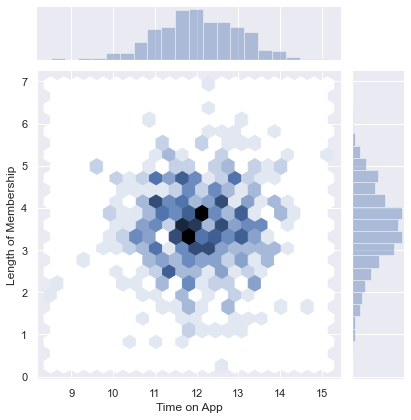

In [8]:
#Time on App and Length of Membership

sns.jointplot(x=df['Time on App'], y=df['Length of Membership'], kind='hex')

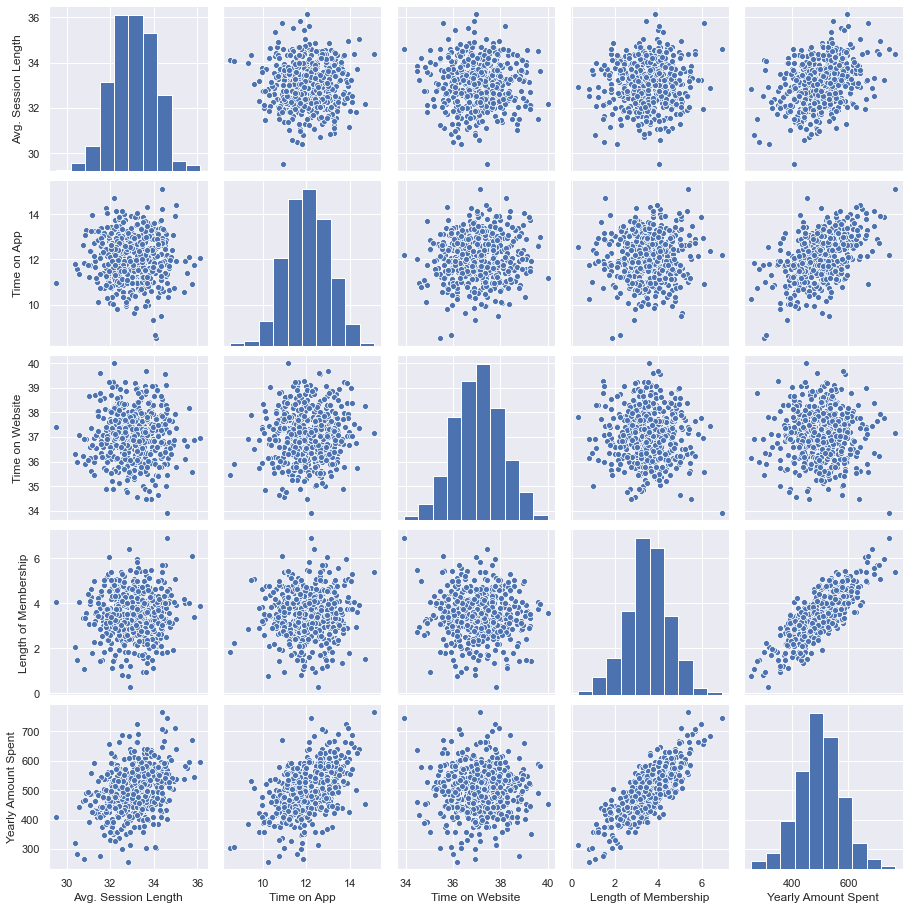

In [9]:
sns.pairplot(df)

Based on the pairplot - Yearly Amount Spent and Length of Membership provides strong relationship

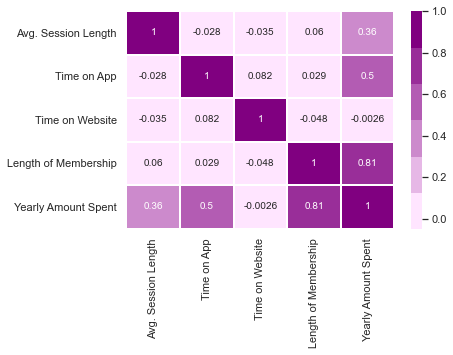

In [10]:
cmap = sns.light_palette("purple")
sns.heatmap(df.corr(), annot=True, annot_kws={'size': 10}, linecolor='white', linewidths=1, cmap=cmap)

Yearly Amount Spent and Length of Membership - positive correlation 
other relationships seem weak

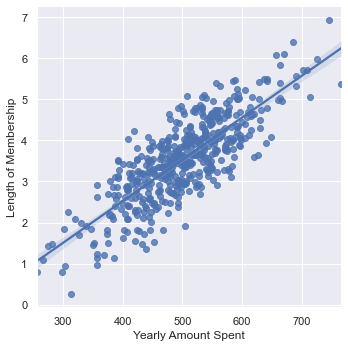

In [11]:
#linear model plot - Yearly Amount Spent vs. Length of Membership

sns.lmplot(x='Yearly Amount Spent', y='Length of Membership', data=df)

Train/Test
X: numerical features of the customers 

y: Yearly Amount Spent (dependent)

In [12]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [13]:
X=df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y =df['Yearly Amount Spent']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
lm = LinearRegression()

In [16]:
#test_size=0.3 and random_state=101

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [17]:
lm.fit(X_train,y_train)

LinearRegression()

In [18]:
len(X_train)

350

In [19]:
len(y_train)

350

In [20]:
len(y_test)

150

In [21]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [22]:
lm.intercept_

-1047.9327822502385

In [23]:
X[:5]

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [24]:
pd.DataFrame(lm.coef_, index=X.columns, columns=['coef'])

,coef
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [25]:
lm.score(X_test,y_test)

0.9890046246741234

In [26]:
prediction = lm.predict(X_test)
prediction

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

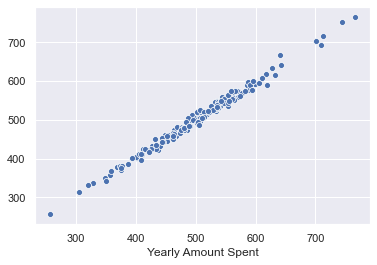

In [27]:
sns.scatterplot(x=y_test, y=prediction)

Model performance eval 
- residual sum of squares 
- explained variance score (R^2).

In [28]:
from sklearn import metrics

In [29]:
metrics.mean_absolute_error(y_test, prediction)

7.228148653430838

In [30]:
metrics.r2_score(y_test, prediction)

0.9890046246741234

In [31]:
metrics.mean_squared_error(y_test, prediction)

79.81305165097461

In [32]:
np.sqrt(metrics.mean_squared_error(y_test, prediction))

8.933815066978642

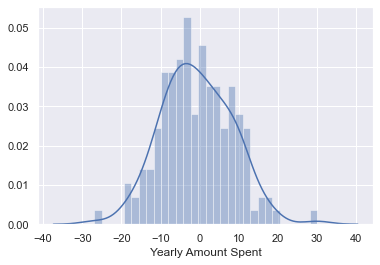

In [33]:
sns.distplot((y_test - prediction), bins=30)

Conclusion

Coefs
- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. 
- How much would it cost ($ and time) to focus more on the website or the app 
- cost benefit analysis needed
